# Corrigez une série temporelle des variations saisonnières

## Exemple Y = Tendance + Saisonnalité + Résidu

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

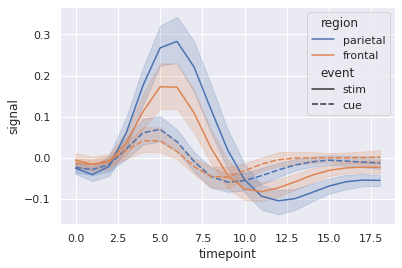

In [9]:

sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [12]:
mois = list(range(1, 38)) # dernier 37 : janvier de la 3ème année

In [70]:
# Tendance
T = [(1+ 0.5 * t) for t in mois]


In [71]:
T

[1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5]

In [72]:
# Saisonnalité
S = [2*math.sin((t-1)*(2*math.pi)/12) for t in mois]


In [73]:
# Résidu
# modélisé par un bruit gaussien d'écart type 0.5
epsilon = np.random.normal(0,0.5,37)


In [74]:

M1 = np.add(T, S) 

M1

array([ 1.5       ,  3.        ,  4.23205081,  5.        ,  5.23205081,
        5.        ,  4.5       ,  4.        ,  3.76794919,  4.        ,
        4.76794919,  6.        ,  7.5       ,  9.        , 10.23205081,
       11.        , 11.23205081, 11.        , 10.5       , 10.        ,
        9.76794919, 10.        , 10.76794919, 12.        , 13.5       ,
       15.        , 16.23205081, 17.        , 17.23205081, 17.        ,
       16.5       , 16.        , 15.76794919, 16.        , 16.76794919,
       18.        , 19.5       ])

In [75]:
M = np.add(M1,epsilon)

In [76]:
M

array([ 1.17171381,  3.05968989,  3.26257421,  5.23427461,  4.62227934,
        4.47908643,  4.66485169,  4.03151751,  3.674049  ,  3.38885124,
        5.17743244,  5.59001511,  7.5211669 ,  9.20720412,  9.7957881 ,
       11.12498085, 11.57431629, 12.00149855, 10.26871423, 10.02094274,
        9.4738467 ,  9.02337841, 10.7737569 , 12.23376466, 13.68211434,
       14.60791597, 15.81524879, 16.85099075, 17.87401454, 17.41412762,
       16.21211639, 15.39790451, 15.67664103, 16.66124073, 16.40120674,
       17.80182087, 19.68825556])

# Série temporelle complète

<AxesSubplot:xlabel='mois', ylabel='valeur'>

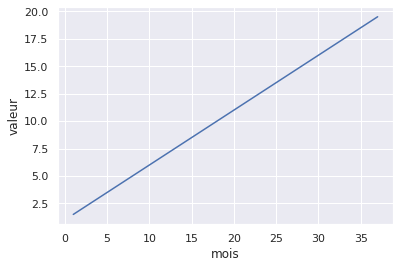

In [18]:
# Série temporelle complète

df = pd.DataFrame({"mois": mois,
                    "valeur" : T})
sns.lineplot(x="mois", y="valeur",data=df)

<AxesSubplot:xlabel='mois', ylabel='valeur'>

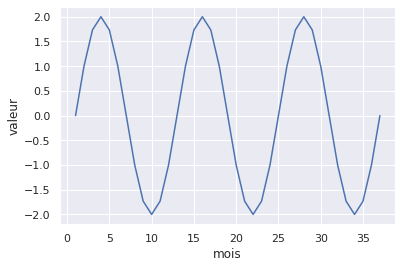

In [19]:
df = pd.DataFrame({"mois": mois,
                    "valeur" : S})
sns.lineplot(x="mois", y="valeur",data=df)

<AxesSubplot:xlabel='mois', ylabel='valeur'>

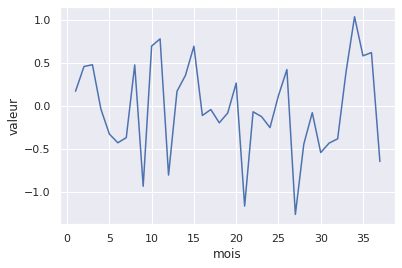

In [27]:
df = pd.DataFrame({"mois": mois,
                    "valeur" : epsilon})
sns.lineplot(x="mois", y="valeur",data=df)

<AxesSubplot:xlabel='mois', ylabel='valeur'>

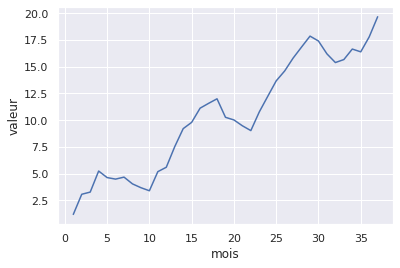

In [77]:
df = pd.DataFrame({"mois": mois,
                    "valeur" : M})
sns.lineplot(x="mois", y="valeur",data=df)

In [29]:
from pylab import *

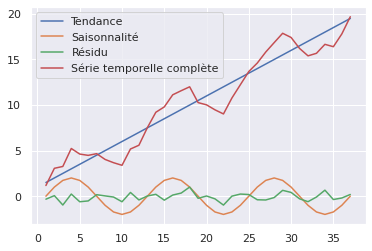

In [79]:

plot(mois, T , label="Tendance")
plot(mois, S , label="Saisonnalité")
plot(mois, epsilon , label="Résidu")
plot(mois, M , label = "Série temporelle complète")

plt.legend()



show()

In [7]:
# Courbe corrigée des variation saisonnières
